In [99]:
import numpy as np

In [100]:
class FullyConnectedLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [101]:
class ActivationLayer:
    def __init__(self, activation, activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_derivative(self.input)

In [102]:
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [103]:
def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return np.array(x >= 0).astype('int')
    
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

In [104]:
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [105]:
from torchvision.datasets import MNIST

train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

x_train = train_set.data.numpy().astype('float32')[:1000]
x_train /= 255
y_train = train_set.targets.numpy()[:1000]
y_train = np.eye(10)[y_train]

print(x_train.data.shape)
print(y_train.data.shape)
y_train[0]

(1000, 28, 28)
(1000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [106]:
network = [
    FlattenLayer((28, 28)),
    FullyConnectedLayer(28 * 28, 128),
    ActivationLayer(relu, relu_derivative),
    FullyConnectedLayer(128, 10),
    ActivationLayer(relu, relu_derivative),
    SoftmaxLayer(10)
]

epochs = 20
learning_rate = 0.1

mses = []

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_derivative(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    mses.append(error)
    
    print('%d/%d, loss = %f' % (epoch + 1, epochs, error))

1/20, loss = 0.182565
2/20, loss = 0.180366
3/20, loss = 0.175035
4/20, loss = 0.169103
5/20, loss = 0.170147
6/20, loss = 0.167460
7/20, loss = 0.170285
8/20, loss = 0.162038
9/20, loss = 0.159860
10/20, loss = 0.158608
11/20, loss = 0.160182
12/20, loss = 0.161191
13/20, loss = 0.161968
14/20, loss = 0.162636
15/20, loss = 0.160150
16/20, loss = 0.161616
17/20, loss = 0.160992
18/20, loss = 0.158234
19/20, loss = 0.159096
20/20, loss = 0.157278


In [107]:
mses

[0.1825654709472266,
 0.18036629315542535,
 0.17503539064125404,
 0.16910266397340842,
 0.17014686652257122,
 0.1674604339588156,
 0.17028534243357404,
 0.16203793658501117,
 0.15985968884325846,
 0.15860803191851425,
 0.16018150031707518,
 0.161191382842755,
 0.16196840467057716,
 0.16263640857203673,
 0.1601501592445849,
 0.1616155135414189,
 0.16099199522738783,
 0.15823428566063513,
 0.15909623429029285,
 0.1572776940912526]

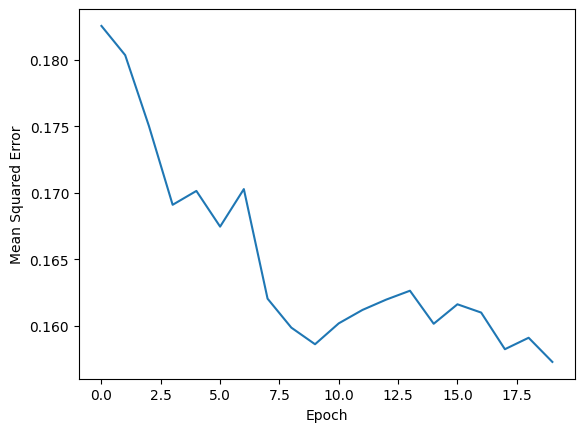

In [108]:
# visualization of training loss
import matplotlib.pyplot as plt

plt.plot(range(len(mses)), mses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()